In [1]:
import pickle
import numpy as np

pickle_in = open("X_train.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("y_train.pickle","rb")
y_train = pickle.load(pickle_in)

X_train = np.array(X_train/255.0)
y_train = np.array(y_train)

pickle_in = open("X_test.pickle","rb") 
X_test = pickle.load(pickle_in)

pickle_in = open("y_test.pickle","rb") 
y_test = pickle.load(pickle_in)

X_test = np.array(X_test/255.0) 
y_test = np.array(y_test)

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

In [3]:
classifier = Sequential()
classifier.add(Flatten(input_shape=X_train.shape[1:]))
classifier.add(Dense(128, activation='relu'))
classifier.add(Dense(64, activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(1, activation='sigmoid'))

In [4]:
classifier.compile(optimizer='adam',
             loss='binary_crossentropy', metrics=['accuracy'])

r=classifier.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
36/36 [==============================] - 3s 78ms/step - loss: 2.0636 - accuracy: 0.7845 - val_loss: 0.6607 - val_accuracy: 0.8576
Epoch 2/5
36/36 [==============================] - 2s 68ms/step - loss: 0.8073 - accuracy: 0.8740 - val_loss: 0.6415 - val_accuracy: 0.8997
Epoch 3/5
36/36 [==============================] - 2s 64ms/step - loss: 0.5105 - accuracy: 0.9088 - val_loss: 0.6037 - val_accuracy: 0.8608
Epoch 4/5
36/36 [==============================] - 2s 62ms/step - loss: 0.3131 - accuracy: 0.9218 - val_loss: 0.4225 - val_accuracy: 0.8835
Epoch 5/5
36/36 [==============================] - 2s 68ms/step - loss: 0.2159 - accuracy: 0.9522 - val_loss: 0.4075 - val_accuracy: 0.8803


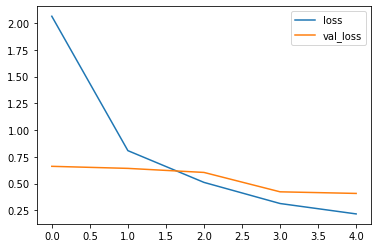

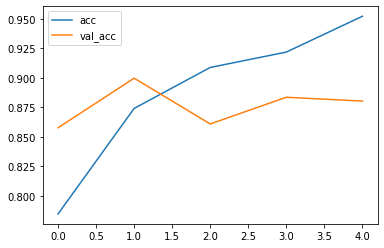

In [5]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()